# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts depending on how you perform in the following sections.

To get started, you must make a copy of this template and rename it under this format: **yourUVaID_assignment_1.ipynb**. You will need to submit it with all of your outputs included to Gradecope.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

The current task at hand is to create a model that will best predict medical costs, which is a regression task. The model will learn from patient data to estimate the insurance based on a given patient's features. To make predictions with this model, you need to provide it with the necessary input data, which consists of a set of relevant features that describe a person. Once the model receives this input, it will process the data and generate an output, which is the predicted medical costs based on the given features. The model can help various stakeholders in the medical field make more informed, data-driven decisions. The performance measure used to evaluate the medical cost prediction model is the root mean square error (RMSE). The data is the data provided by the Kaggle. The training dataset has 1338 entries each with 7 different explanatory variables. I will compare models generated using the normal equation, gradient descent, and stochastic gradient descent to determine which performs best. Given the time frame of this project, I will do my best to generate models that will predict medical costs with reasonable error. It is reasonable to assume that given a patient of similar values for each given feature, he/she will have a similar medical cost. If this assumption does not hold, then our regression model would fail to predict a given patient's medical cost based on its features.

In [277]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.

In [278]:
def loadInsuranceData():
  # The column names are adopted from the dataset page on Kaggle
  insurance = pd.read_csv('data\\insurance.csv')
  return insurance

insurance = loadInsuranceData()
insurance.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [279]:
# Size information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [280]:
# Number of row and cols
insurance.shape

(1338, 7)

In [281]:
# Listing all categorical columns by filtering columns of type object
categorical_columns = insurance.select_dtypes(include=['object']).columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [282]:
# Listing all columns with numerical values by filtering columns of type int64 and float64
numerical_columns = insurance.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [283]:
# Create df that contains columnds with NaN values
missing_values = insurance.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

Series([], dtype: int64)

In [284]:
# Basic statistics for numerical columns
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class.

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [285]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns

# Your code goes here for this section.

# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

X_train_unprepared = train_set.drop("charges", axis=1) 
y_train = train_set["charges"].copy()
X_test_unprepared = test_set.drop("charges", axis=1)
y_test = test_set["charges"].copy()

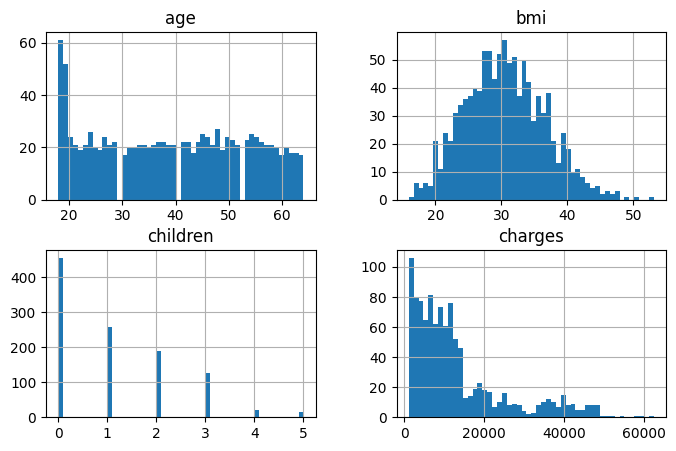

In [286]:
# Plotting out numerical data frequency as histogram
train_set.hist(bins=50, figsize=(8,5))
plt.show()

In [287]:
# How much each feature correlates to the medical charges
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.281721
bmi         0.197316
children    0.071885
Name: charges, dtype: float64

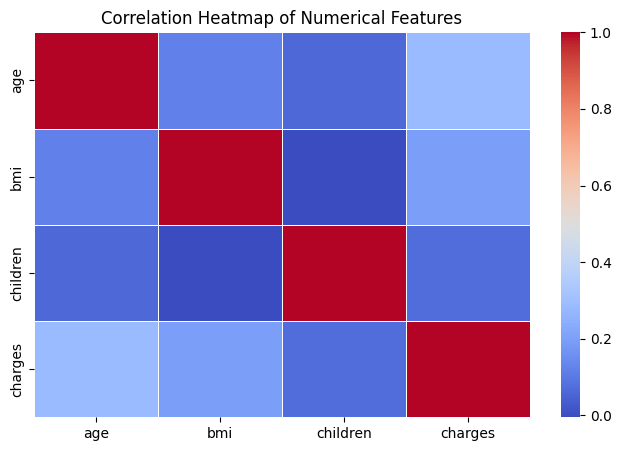

In [288]:
# Plotting the correlation of every numerical feature to every other numerical feature
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

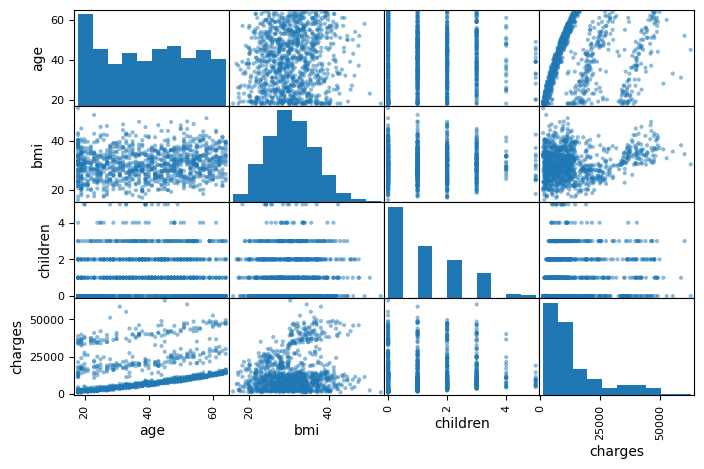

In [289]:
# Plotting the scatter matrix
scatter_matrix(train_set, figsize=(8, 5))

In [290]:
# Remove charges from numerical cols to go into the pipline
numerical_columns = [col for col in numerical_columns if col != "charges"]

# Pipeline
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_columns),
        ("cat", OneHotEncoder(), categorical_columns),
    ])

X_test_prepared = full_pipeline.fit_transform(X_test_unprepared)
X_train_prepared = full_pipeline.fit_transform(X_train_unprepared)

In [291]:
X_train_prepared.shape

(1070, 11)

In [292]:
X_test_prepared.shape

(268, 11)

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods.

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [293]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = []; # parameter vector;
    self.alpha = 0.05; # learning rate
    self.cost  = []; # cost function

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    # implementation code here

    # Call the gradient descent function with the training data and random theta
    self.gradientDescent(X_train, y_train, np.random.randn(X_train.shape[1] + 1), self.alpha, 10000)

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.

    # Add a bias column
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    # Update theta
    self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here

    # Set the alpha
    self.alpha = alpha
    # Add a bias column
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Clear cost to append to
    self.cost = []

    # Loop through the number of iterations
    for _ in range(iters):
      # Calculate the cost and append to the cost list
      cost = 1/(X_b.shape[0]) * np.sum((X_b.dot(theta) - y_train)**2)
      self.cost.append(cost)
      # Calculate the gradients and update theta
      gradients = 2/(X_b.shape[0]) * X_b.T.dot(X_b.dot(theta) - y_train)
      theta = theta - alpha * gradients

    self.theta = theta

  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here

    # Add a bias column
    X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    # Predict the values
    y_predict = X_b.dot(self.theta)
    
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    return "Parameter vector is: {}".format(self.theta)

# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()

myGradientDescentModel.fitUsingGradientDescent(X_train_prepared, y_train)

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

Text(0.5, 1.0, 'Error vs. Training Iterations')

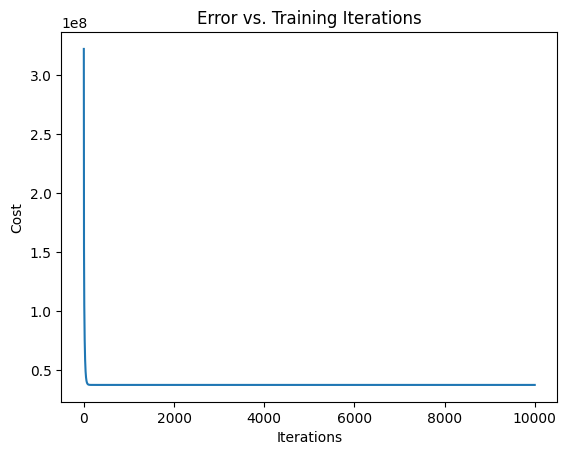

In [294]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.

# Plotting the cost function
plt.plot(range(10000), myGradientDescentModel.cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Iterations')

Since the methods are created in a way that is difficult to provide seperate graphs, I will instead note down observations I had on different alpha values and learning rates:

- When the alpha value is too low, the curve drops off much slower
- When the alpha value is too large, the cost gets worse over time or just never converge
- When the iterations is too large, it takes significantly longer to fit

I found that 10000 iterations takes a reasonable amount of time to fit and that a learning rate of 0.05 provides a steep decay to a small number

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [295]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train_prepared, y_train)

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [297]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train_prepared,y_train)
y_predict = mySGDModel.predict(X_test_prepared)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
mySGDModel_mae = mean_absolute_error(y_test, y_predict)
print("SGD RSME: ", mySGDModel_rmse)
print("SGD MAE: ", mySGDModel_mae)

# Find the RMSE and MAE for the Normal Equation and Gradient Descent Models
y_predict = myGradientDescentModel.predict(X_test_prepared)
mse = mean_squared_error(y_test, y_predict)
myGradientDescentModel_rmse = np.sqrt(mse)
myGradientDescentModel_mae = mean_absolute_error(y_test, y_predict)
print("GD RSME: ", myGradientDescentModel_rmse)
print("GD MAE: ", myGradientDescentModel_mae)

y_predict = myNormalEquationModel.predict(X_test_prepared)
mse = mean_squared_error(y_test, y_predict)
myNormalEquationModel_rmse = np.sqrt(mse)
myNormalEquationModel_mae = mean_absolute_error(y_test, y_predict)
print("NM RSME: ", myNormalEquationModel_rmse)
print("NM MAE: ", myNormalEquationModel_mae)

SGD RSME:  5802.66967115051
SGD MAE:  4196.674890185791
GD RSME:  5795.33253301876
GD MAE:  4167.870547845395
NM RSME:  5795.332533018758
NM MAE:  4167.870547845391


- All three models yield about the same RSME and MAE indicating that my models were implemented correctly. I found that the gradient descent and the normal equation model yielded the best MAE and are therefore the best performers. 
- The MAE of both the gradient descent and the normal equation model are about $4200 while the average charge is $13300 so compared to the mean the average is not terrible but also not great. The error is 31% of the mean indicating that our model makes reasonable predictions most of the time but there are most likely better, more optimized models.

- - -
## Task 6. PRESENT YOUR SOLUTION

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

I would pitch my solution by describing the process I took to arrive at the best-performing model. I would pitch how after cleaning the data, I explored different learning rates and number of iterations until I arrived at an optimal pairing that allowed the models to take a reasonable amount of time to fit while also seeing a rapid decay to small numbers with is a learning rate of 0.05 and 10000 iterations. I then explored multiple models including Scholastic Gradient Descent, Gradient Descent, and Normal Equation, and identified that Gradient Descent and Normal Equation perform equally well. However, since there is a small number of features compared to the number of data points, a Normal Equation model would be the most efficient so I would pitch the Normal Equation model.

I learned about how certain models arrive at the theta instead of just calling methods from a library. I also explored different learning rates and the number of iterations during Gradient Descent. A learning rate that is too small slowed down the model convergence, while a learning rate that is too large caused the cost function to fluctuate and never converge.

Some insights as to how we can improve the solution is to collect more data. By collecting more data, we will be able to make better generalizations and see trends that we might not be able to see now with this data. More data would also reduce the effect of any bias that may have occurred when collecting the current data. It would also help refine our models if we had more features to work with.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS 4774 Assignment 1:...".

Best of luck and have fun!